# User's Guide, Chapter 31: Clefs, Ties, and Beams

Throughout the first thirty chapters, we have repeatedly been using fundamental music notation principles, such as clefs, ties, and beams, but we have never talked about them directly.  This chapter gives a chance to do so and to look at some `Stream` methods that make use of them.

Let's first look at clefs.  They all live in the :ref:`moduleClef` module:

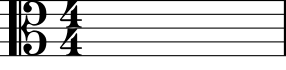

In [11]:
alto = clef.AltoClef()
m = stream.Measure([ac])
m.show()

Since clefs can be put into Streams, they are Music21Objects, with offsets, etc., but they generally have a Duration of zero.

In [12]:
alto.offset

0.0

In [13]:
alto.duration

<music21.duration.Duration 0.0>

Multiple clefs can coexist in the same measure, and will all display (so long as there's at least one note between them; a problem of our MusicXML readers):

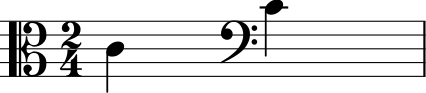

In [14]:
m.append(note.Note('C4'))
bass = clef.BassClef()
m.append(bass)
m.append(note.Note('C4'))
m.show()

Most of the clefs in common use are `PitchClefs` and they know what line they are on:

In [15]:
alto.line

3

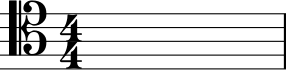

In [16]:
tenor = clef.TenorClef()
tenor.show()

In [17]:
tenor.line

4

In this case, the line refers to the pitch that it's "sign" can be found on.

In [18]:
tenor.sign

'C'

In [19]:
treble = clef.TrebleClef()
treble.sign

'G'

Clefs 